# Visualisation

I generate visual insights by plotting grouped data. I use the personal information data of the customers and rating data that originates from sub-project 3.

0. Import Libraries and do general settings

In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel(r"C:\Users\felis\Github_DataScience\BMW_Portfolio\dataset.xlsx")

1. Visualise Personal Data

In [4]:
df.groupby("Gender")["Age"].mean()

Gender
diverse    41.400000
female     38.936735
male       39.479592
Name: Age, dtype: float64

In [5]:
df.groupby("City")["Age"].mean()

City
Berlin       38.050000
Frankfurt    39.307500
Hamburg      40.320000
München      38.866667
Name: Age, dtype: float64

In [6]:
df.groupby("Gender")["City"].value_counts()

Gender   City     
diverse  Frankfurt      8
         Hamburg        5
         München        5
         Berlin         2
female   Frankfurt    188
         München      148
         Hamburg       93
         Berlin        61
male     Frankfurt    204
         München      147
         Hamburg      102
         Berlin        37
Name: count, dtype: int64

In [7]:
df.groupby("City")["Gender"].value_counts()
# this is the same: df.groupby(["City", "Gender"])["Gender"].count()

City       Gender 
Berlin     female      61
           male        37
           diverse      2
Frankfurt  male       204
           female     188
           diverse      8
Hamburg    male       102
           female      93
           diverse      5
München    female     148
           male       147
           diverse      5
Name: count, dtype: int64

Text(0.5, 1.0, 'Sum of Occurrences of Each Gender within Each City Group')

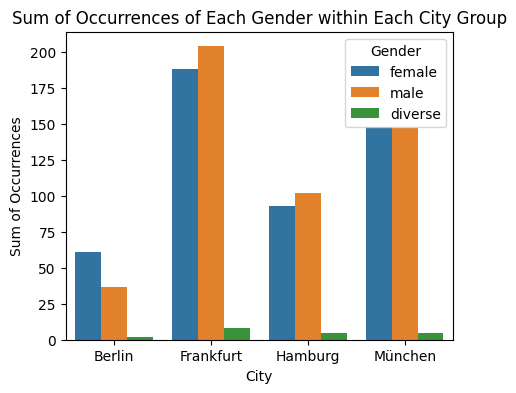

In [78]:
# Perform the groupby and sum operations
gender_counts_by_city = df.groupby("City")["Gender"].value_counts().reset_index(name="Count")

# Create a bar plot
plt.figure(figsize=(5, 4))
sns.barplot(x="City", y="Count", hue="Gender", data=gender_counts_by_city)

# Set labels and title
plt.xlabel("City")
plt.ylabel("Sum of Occurrences")
plt.title("Sum of Occurrences of Each Gender within Each City Group")

Text(0.5, 1.0, 'Sum of Occurrences of Each Gender within Each City Group')

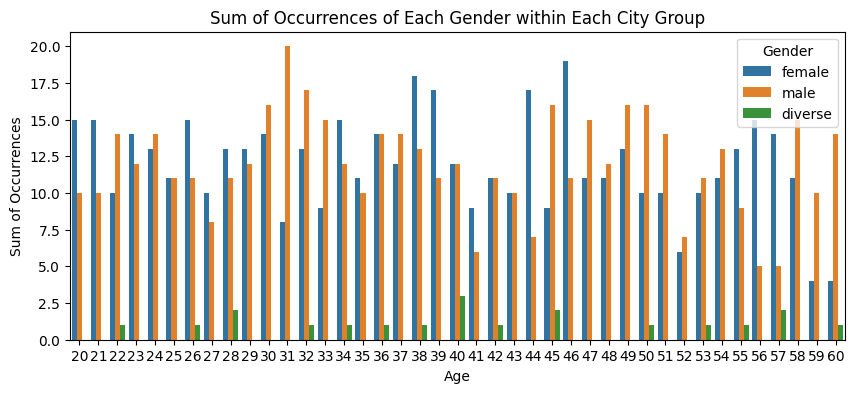

In [82]:
# Perform the groupby and sum operations
age_counts_by_city = df.groupby("Age")["Gender"].value_counts().reset_index(name="Count")

# Create a bar plot
plt.figure(figsize=(10, 4))
sns.barplot(x="Age", y="Count", hue="Gender", data=age_counts_by_city)

# Set labels and title
plt.xlabel("Age")
plt.ylabel("Sum of Occurrences")
plt.title("Sum of Occurrences of Each Gender within Each City Group")

2. Visualise personal data related to the credit rating

The following dataset is created in sub-project 3. Please refer to this project to understand how the data was computed.

In [13]:
creditscores = pd.read_excel(r"C:\Users\felis\Github_DataScience\BMW_Portfolio\creditscores.xlsx")

In [24]:
df = df.merge(creditscores, left_index=True, right_index=True)

hhttps://www.investopedia.com/terms/c/credit_score.asp

Here are the general ranges for how credit scores are categorized.4

    Excellent: 800–850
    Very Good: 740–799
    Good: 670–739
    Fair: 580–669
    Poor: 300–579

In [31]:
df["rating"] = None

for index, score in df["scaled_scores"].items():
    if 299 < score < 580:
        df.loc[index, "rating"] = "Very Bad"
    elif 580 <= score < 670:
        df.loc[index, "rating"] = "Bad"
    elif 670 <= score < 740:
        df.loc[index, "rating"] = "Medium"
    elif 740 <= score < 800:
        df.loc[index, "rating"] = "Good"
    elif 800 <= score <= 850:
        df.loc[index, "rating"] = "Very Good"

In [32]:
df.head()

,ID,Age,City,Gender,paymenthistory,nolatepayment,timelatepayment,creditavailable,creditused,lengthcredithistory,creditmix,newcredit,rating,scaled_scores
0,1,23,Frankfurt,female,No,8.0,39.0,428445.0,296828.646112,3.222556,2.0,Yes,Bad,669.158671
1,2,22,München,male,No,6.0,19.0,363420.0,197095.293621,2.397118,4.0,Yes,Very Bad,393.180647
2,3,25,Hamburg,female,Yes,NaN,NaN,251810.0,206543.642966,2.380299,4.0,Yes,Medium,702.323374
3,4,24,München,female,No,1.0,1.0,204560.0,59931.380523,1.653316,3.0,No,Very Bad,441.813171
4,5,25,München,male,No,6.0,51.0,277439.0,161274.966325,4.384699,2.0,Yes,Very Bad,401.832261


In [53]:
# change the order of the rating column
order = ["Very Bad", "Bad", "Medium", "Good", "Very Good"]

In [54]:
df['rating'] = pd.Categorical(df['rating'], categories=order, ordered=True)

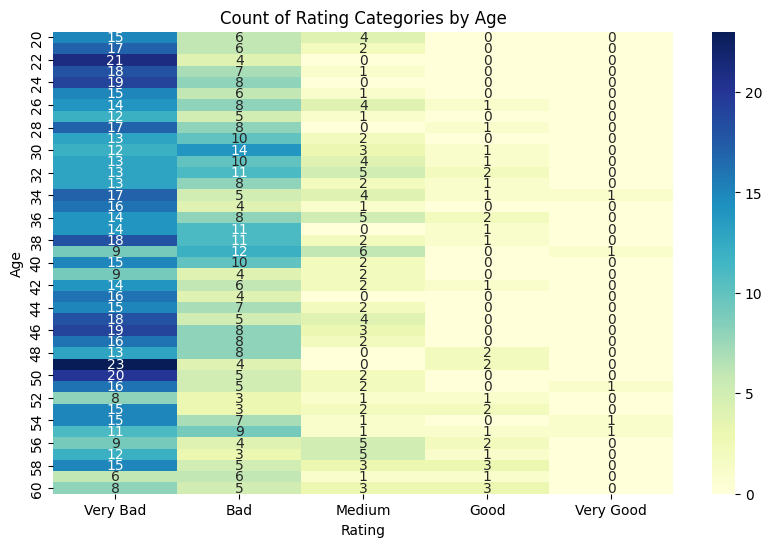

In [55]:
# Create a pivot table to get the counts of each rating category for each age
pivot_table = df.pivot_table(index='Age', columns='rating', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Age')
plt.title('Count of Rating Categories by Age')

plt.show()

In [47]:
# this code shows the same information in a non-visual manner. delete # if you wish to see it
# df.groupby(["Age", "rating"])["rating"].count()

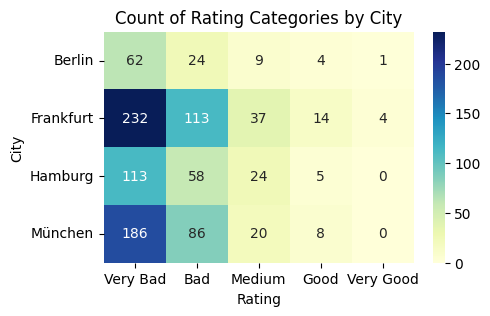

In [56]:
# Create a pivot table to get the counts of each rating category for each city
pivot_table = df.pivot_table(index='City', columns='rating', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('City')
plt.title('Count of Rating Categories by City')

plt.show()

In [57]:
# this code shows the same information in a non-visual manner. delete # if you wish to see it
# df.groupby(["City", "rating"])["rating"].count()

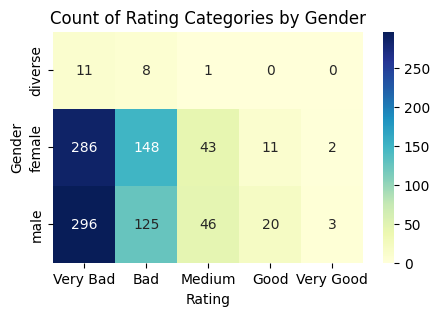

In [58]:
# Create a pivot table to get the counts of each rating category for each gender
pivot_table = df.pivot_table(index='Gender', columns='rating', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(pivot_table, annot=True, fmt='d', cmap='YlGnBu', cbar=True)

# Set labels and title
plt.xlabel('Rating')
plt.ylabel('Gender')
plt.title('Count of Rating Categories by Gender')

plt.show()

C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(38.347222222222214, 0.5, 'Scaled scores')

C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 17.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


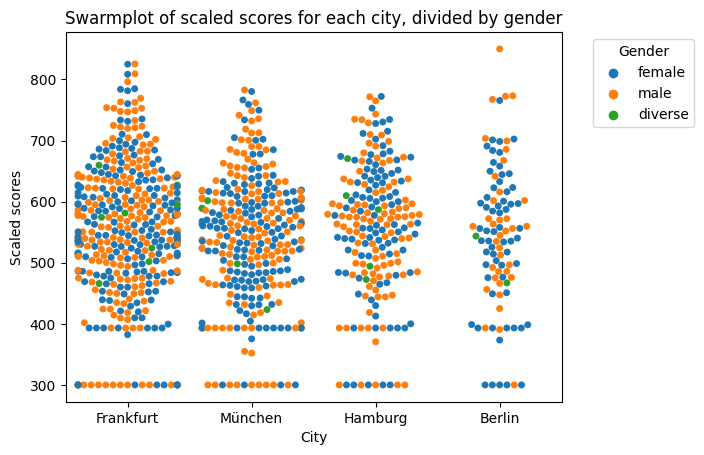

In [77]:
sns.swarmplot(x = "City", y= "scaled_scores", data = df, hue = "Gender")
plt.title("Swarmplot of scaled scores for each city, divided by gender")
plt.legend(title="Gender", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Scaled scores")

Text(38.347222222222214, 0.5, 'Scaled scores')

C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 13.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\felis\.conda\envs\gee\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 12.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


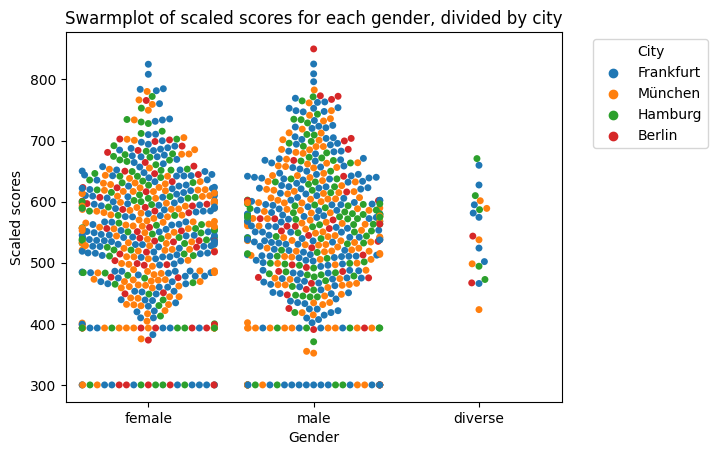

In [76]:
sns.swarmplot(x = "Gender", y= "scaled_scores", data = df, hue = "City")
plt.title("Swarmplot of scaled scores for each gender, divided by city")
plt.legend(title="City", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel("Scaled scores")